Question to solve:
Indicates whether the patient died during the follow-up period (binary: 0 for no, 1 for yes)

1.What is the distribution of age among heart failure patients in the dataset
2.How does the death rate vary with age
3.What is the percentage of male and female patients in the dataset?
4. How does the platelet count vary among different age groups?
5. Is there a correlation between creatinine and sodium levels in the blood?
6. How does the prevalence of high blood pressure differ between male and female patients?
7. What is the relationship between smoking habits and the occurrence of heart failure?
8. Are there any noticeable patterns in the distribution of death events across different age groups?
9. Is there any significant difference in ejection fraction between patients with and without diabetes?
10. How does the serum creatinine level vary between patients who survived and those who did not?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_columns', 30)

x=dependent variable, y=Independent

In [7]:
df=pd.read_csv("/Users/anweshamandal/Downloads/pwskills_eda/heart_failure_clinical_records_dataset.csv")

In [9]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
df.isnull().values.any()  #so no null value is there, since it is false

False

In [13]:
df.shape

(299, 13)

In [15]:
df.dtypes


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [19]:
df.head(299)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [21]:
df["age"] = df["age"].astype(int, errors = 'ignore')

In [23]:
#df["age"] = pd.to_numeric(df["age"], errors = 'coerce')

In [25]:
df["age"]

0      75
1      55
2      65
3      50
4      65
       ..
294    62
295    55
296    45
297    45
298    50
Name: age, Length: 299, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


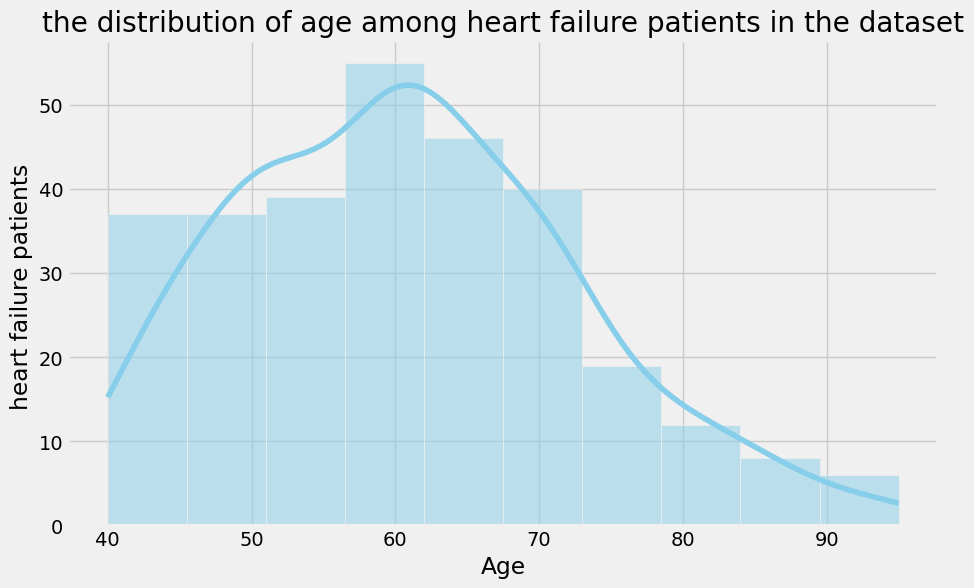

In [29]:
#the distribution of age among heart failure patients in the dataset
plt.figure(figsize = (10, 6))
sns.histplot(df['age'].dropna(), kde = True, color = 'skyblue')
plt.title('the distribution of age among heart failure patients in the dataset')
plt.xlabel('Age')
plt.ylabel('heart failure patients ')
plt.show()

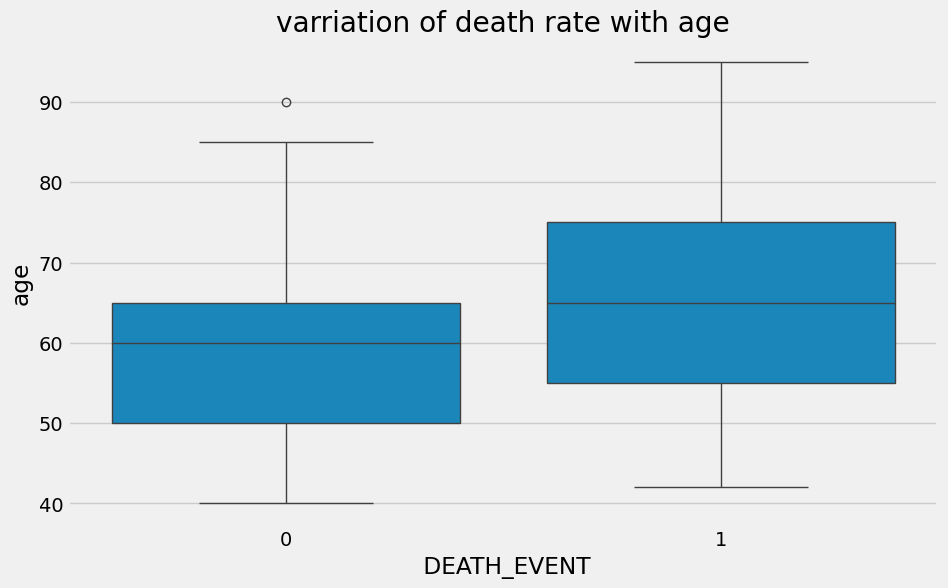

In [31]:
#How does the death rate vary with age
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'DEATH_EVENT', y='age', data=df)
plt.xlabel(' DEATH_EVENT')
plt.ylabel('age')
plt.title("varriation of death rate with age")
plt.show()

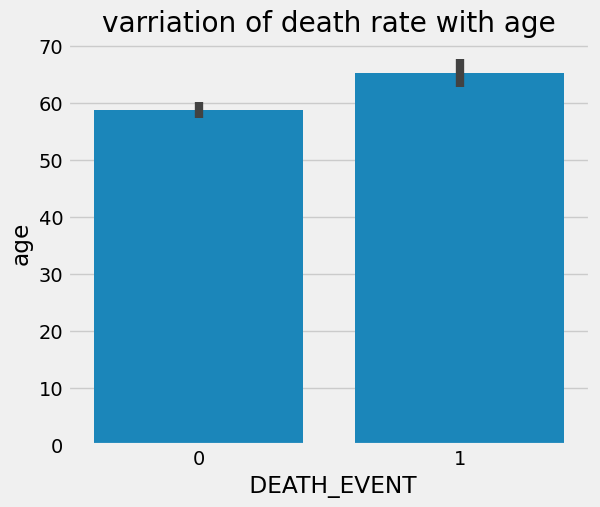

In [33]:
plt.figure(figsize = (6, 5))
sns.barplot(x = 'DEATH_EVENT', y='age', data=df)
plt.xlabel(' DEATH_EVENT')
plt.ylabel('age')
plt.title("varriation of death rate with age")
plt.show()

In [35]:
#%of male and female patients in the dataset
#%male = no. of male/total no of male x 100 
#df['Percentage'] = (df['sex'] / df[''].sum()) * 100
df.loc[:,'sex']

0      1
1      1
2      1
3      1
4      0
      ..
294    1
295    0
296    0
297    1
298    1
Name: sex, Length: 299, dtype: int64

In [37]:
Male=sum(df.loc[:,'sex'])

In [39]:
Male

194

In [41]:
Female=len(df)-Male
Percentage_of_Male=round((Male/len(df))*100,2)
Percentage_of_Female=round((Female/len(df))*100,2)

In [43]:
print('Percentage_of_Female:',Percentage_of_Female)
print('Percentage_of_Male:',Percentage_of_Male)

Percentage_of_Female: 35.12
Percentage_of_Male: 64.88


In [55]:
data=[['Percentage_of_Male', Percentage_of_Male], ['Percentage_of_Female', Percentage_of_Female]]
df1 = pd.DataFrame(data, columns=['SEX', 'Percentage'])

In [57]:
df1

,SEX,Percentage
0,Percentage_of_Male,64.88
1,Percentage_of_Female,35.12


In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEX         2 non-null      object 
 1   Percentage  2 non-null      float64
dtypes: float64(1), object(1)
memory usage: 164.0+ bytes


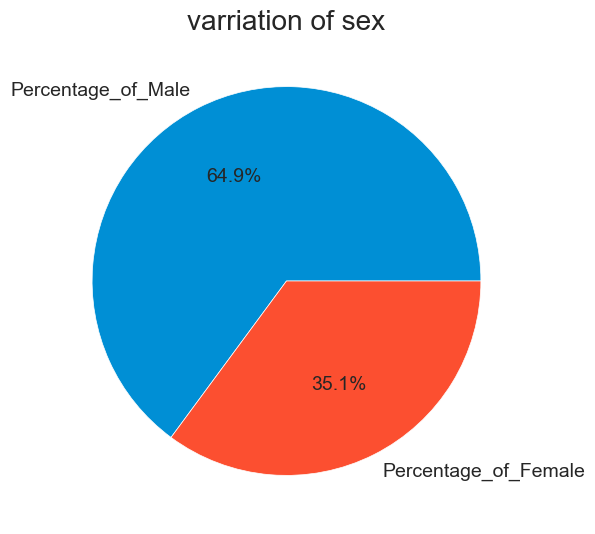

In [67]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df1['Percentage'], labels=df1['SEX'], autopct='%1.1f%%')
plt.title('varriation of sex')
plt.show()


In [75]:
df["platelets"] = df["platelets"].astype(int, errors = 'ignore')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    int64  
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.5 KB


In [81]:
df['age'].max()

95

In [83]:
df['age'].min()

40

In [103]:
df['Age_group']=pd.cut(df['age'], bins=[40, 50, 60,70,80,90,100])
#df2["Age group"] = pd.cut(df.age, range(40, 100, 10), right=False)

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Age_group
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1,"(70, 80]"
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1,"(50, 60]"
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1,"(60, 70]"
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1,"(40, 50]"
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1,"(60, 70]"


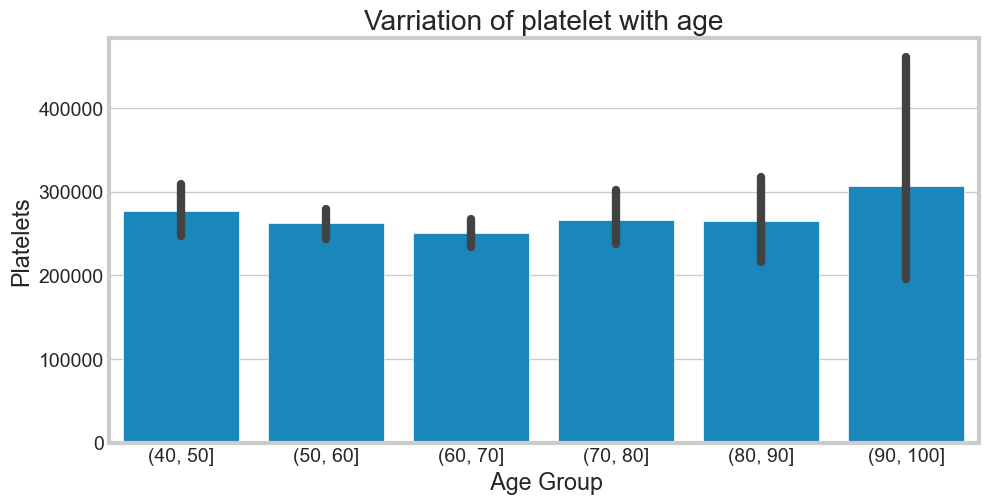

In [113]:
#How does the platelet count vary among different age groups
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Age_group', y='platelets', data=df)
plt.xlabel(' Age Group')
plt.ylabel('Platelets')
plt.title("Varriation of platelet with age")
plt.show()

In [126]:
print(df['serum_creatinine'].corr(df['serum_sodium']))
print("They are negatively corelated")

-0.18909521009117392
They are negatively corelated


<Axes: xlabel='serum_creatinine', ylabel='serum_sodium'>

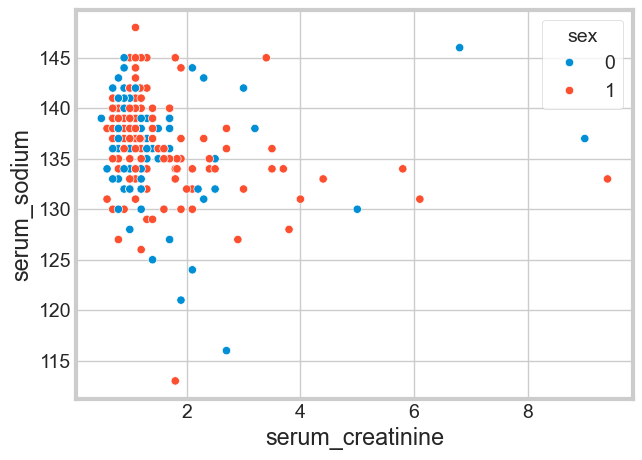

In [120]:
#Is there a correlation between creatinine and sodium levels in the blood?
sns.scatterplot(x = 'serum_creatinine', y = 'serum_sodium', data = df,hue='sex')

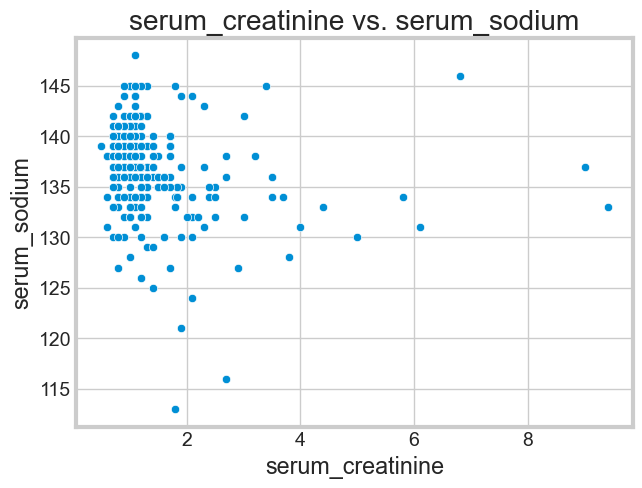

In [136]:
ax = sns.scatterplot(x="serum_creatinine", y="serum_sodium", data=df)
ax.set_title("serum_creatinine vs. serum_sodium")
ax.set_xlabel("serum_creatinine");

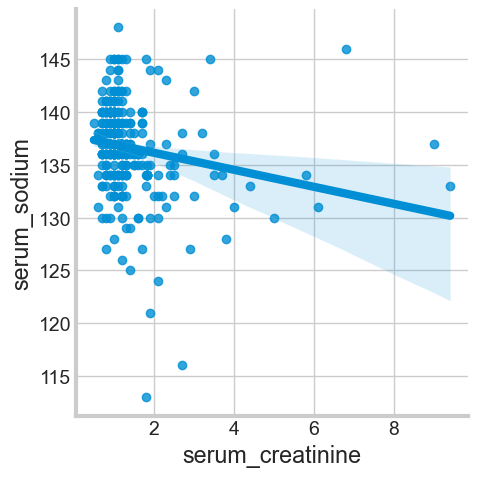

In [142]:
sns.lmplot(x="serum_creatinine", y="serum_sodium", data=df)

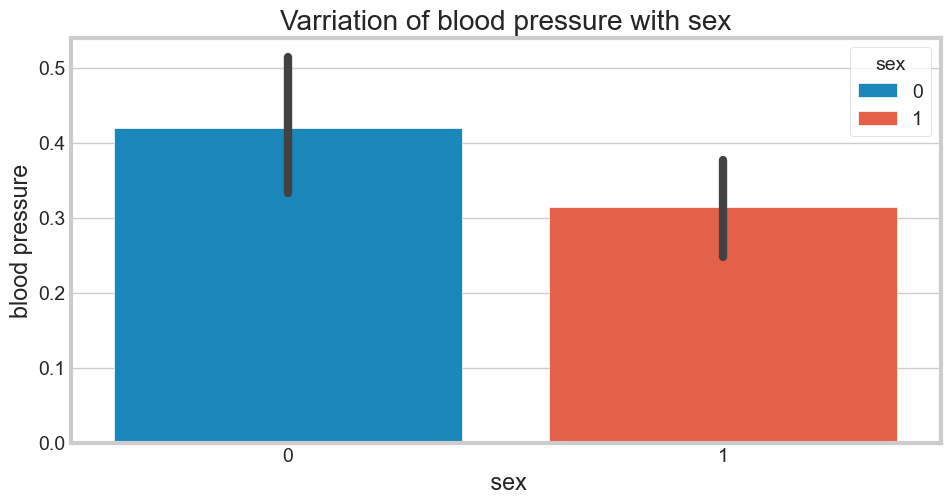

In [146]:
# How does the prevalence of high blood pressure differ between male and female patients?

plt.figure(figsize = (10, 5))
sns.barplot(x = 'sex', y='high_blood_pressure', data=df,hue='sex')
plt.xlabel(' sex')
plt.ylabel('blood pressure')
plt.title("Varriation of blood pressure with sex")
plt.show()

In [158]:
#What is the relationship between smoking habits and the occurrence of heart failure?

print(df['DEATH_EVENT'].corr(df['smoking']))


-0.01262315270935961


In [183]:
df.smoking[1]

0

In [185]:
smoking_exp=0
non_smoking_living=0
smoking_living=0
non_smoking_exp=0

for i in range(0,len(df)):
    if df.smoking[i] == df.DEATH_EVENT[i]:
        if df.smoking[i] == 1:
            smoking_exp+=1
        if df.smoking[i] == 0:
            non_smoking_living+=1
            
    else:
        if df.smoking[i] == 1:
            smoking_living+=1
        if df.smoking[i] == 0:
            non_smoking_exp+=1

print(smoking_exp,non_smoking_living,smoking_living,non_smoking_exp)     

30 137 66 66


In [197]:
data1=[['smoking_exp', smoking_exp], ['smoking_living', smoking_living],['non_smoking_living', non_smoking_living],['non_smoking_exp',non_smoking_exp]]
df2 = pd.DataFrame(data1, columns=['Type','no_of_patients'])


In [200]:
df2

,Type,no_of_patients
0,smoking_exp,30
1,smoking_living,66
2,non_smoking_living,137
3,non_smoking_exp,66


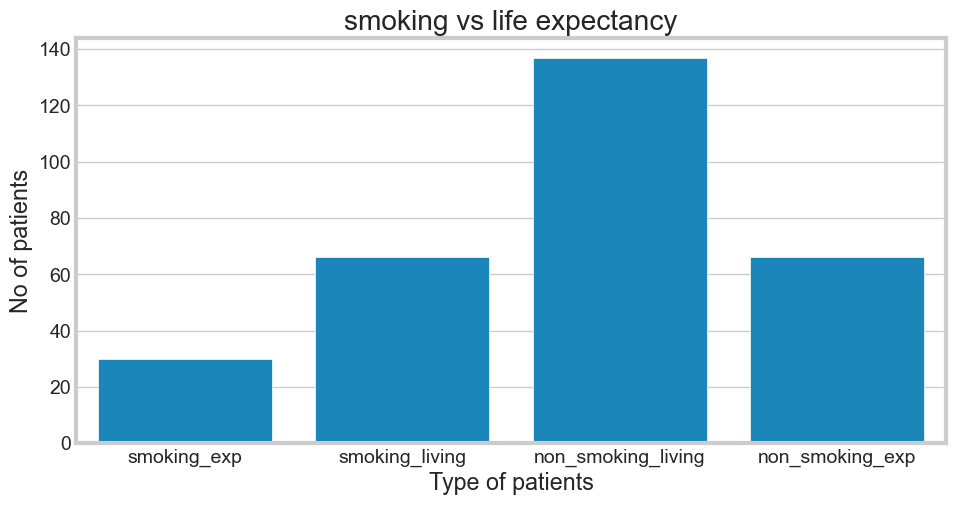

In [206]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Type', y='no_of_patients', data=df2)
plt.xlabel('Type of patients')
plt.ylabel('No of patients')
plt.title("smoking vs life expectancy")
plt.show()

In [216]:
new_df = df[['Age_group', 'DEATH_EVENT']].copy()

In [299]:
new_df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age_group    292 non-null    category
 1   DEATH_EVENT  299 non-null    int64   
dtypes: category(1), int64(1)
memory usage: 3.0 KB


In [307]:
#distribution of age-group and death


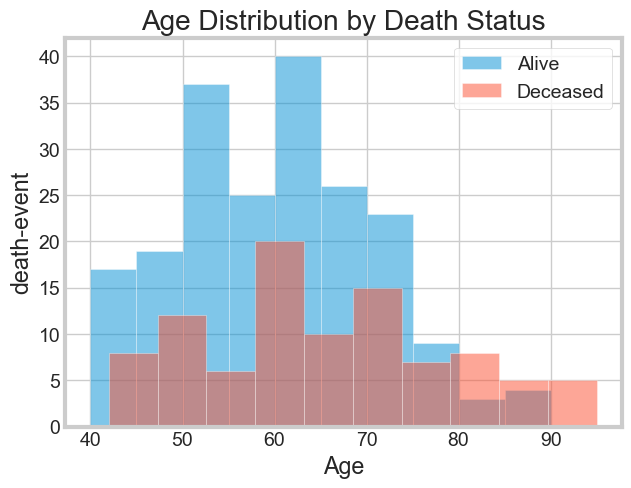

In [305]:
df.groupby('DEATH_EVENT')['age'].hist(alpha=0.5, legend=True)
plt.xlabel('Age')
plt.ylabel('death-event')
plt.title('Age Distribution by Death Status')
plt.legend(['Alive', 'Deceased'])
plt.show()

In [333]:
selected_coulmns = ['diabetes','ejection_fraction']
df[selected_coulmns].corr()
#sns.pairplot(df[selected_coulmns],  palette = 'husl')
#sns.heatmap(df[selected_coulmns].corr(), annot = True, cmap = "coolwarm", linewidth = .5)
#ax = sns.scatterplot(x="ejection_fraction", y="diabetes", data=df)

,diabetes,ejection_fraction
diabetes,1.00000,-0.00485
ejection_fraction,-0.00485,1.00000


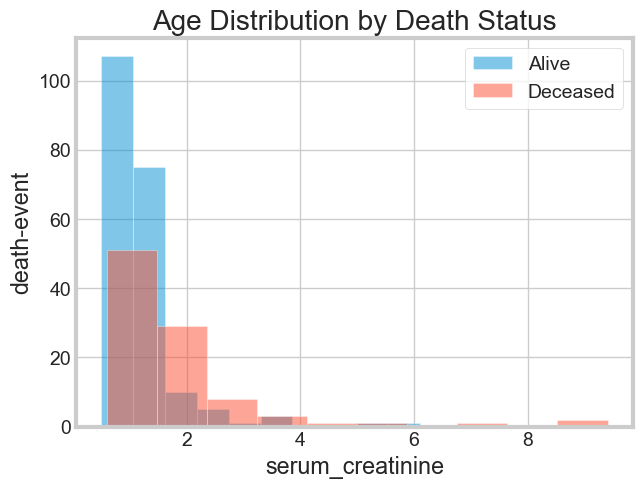

In [335]:
df.groupby('DEATH_EVENT')['serum_creatinine'].hist(alpha=0.5, legend=True)
plt.xlabel('serum_creatinine')
plt.ylabel('death-event')
plt.title('Age Distribution by Death Status')
plt.legend(['Alive', 'Deceased'])
plt.show()